In [137]:
import pandas as pd
import numpy as np
import matplotlib 
%matplotlib inline
GTD = pd.read_csv('globalterrorismdb_0616dist.csv')

In [138]:
pd.options.display.max_columns = 999
pd.options.display.max_rows = 500
GTD.head(0)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,ingroup,ingroup2,ingroup3,gsubname3,motive,guncertain1,guncertain2,guncertain3,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related


In [139]:
Burma = GTD[GTD.country_txt == 'Myanmar']

In [140]:
def eda(dataframe):
    print "missing values \n", dataframe.isnull().sum() 
    print "dataframe types \n", dataframe.dtypes 
    print "dataframe describe \n", dataframe.describe() 
    for item in dataframe: 
        print item        
        print dataframe[item].nunique() 

In [141]:
GTD.suicide.value_counts()

0    152001
1      4771
Name: suicide, dtype: int64

In [142]:
suicide_attack = GTD[GTD.suicide == 1]

In [143]:
regions = GTD.region_txt.unique()
type(regions)

numpy.ndarray

In [144]:
years = GTD.iyear.unique()

In [145]:
regions


array(['Central America & Caribbean', 'North America', 'Southeast Asia',
       'Western Europe', 'East Asia', 'South America', 'Eastern Europe',
       'Sub-Saharan Africa', 'Middle East & North Africa',
       'Australasia & Oceania', 'South Asia', 'Central Asia'], dtype=object)

In [146]:
CA = GTD[GTD.region_txt == 'Central America & Caribbean']
NA = GTD[GTD.region_txt == 'North America']
SEA = GTD[GTD.region_txt == 'Southeast Asia']
WE = GTD[GTD.region_txt == 'Western Europe']
EA = GTD[GTD.region_txt == 'East Asia']
SA = GTD[GTD.region_txt == 'South America']
SSA = GTD[GTD.region_txt == 'Sub-Saharan Africa']
MENA = GTD[GTD.region_txt == 'Middle East & North Africa']
AO = GTD[GTD.region_txt == 'Australasia & Oceania']
SAS = GTD[GTD.region_txt == 'South Asia']
CAS = GTD[GTD.region_txt == 'Central Asia']
Region_DFs = [CA, NA, SEA, WE, EA, SA, SSA, MENA, AO, SAS, CAS]

In [147]:
sum(GTD.region_txt.value_counts())

156772

In [148]:
GTD.region_txt.value_counts()

Middle East & North Africa     40422
South Asia                     37841
South America                  18628
Western Europe                 16020
Sub-Saharan Africa             13434
Southeast Asia                 10360
Central America & Caribbean    10337
Eastern Europe                  4892
North America                   3268
East Asia                        786
Central Asia                     538
Australasia & Oceania            246
Name: region_txt, dtype: int64

In [149]:
40422+37841 #MENA & SAS account for nearly half of all terrorist attacks

78263

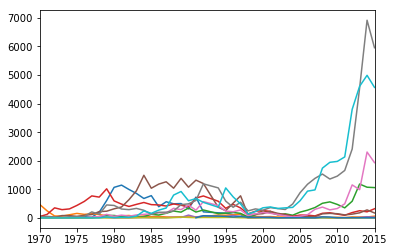

In [150]:
for x in Region_DFs:
    x.iyear.value_counts().sort_index().plot() #all terror attacks from 1970 through 2015

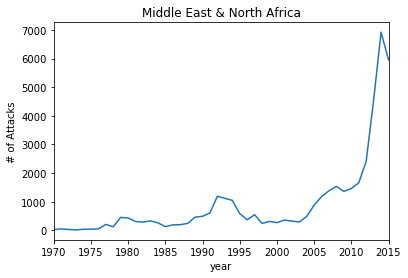

In [152]:
MENA.iyear.value_counts().sort_index(ascending=True).plot() #Middle East & North Africa
plt.title("Middle East & North Africa")
plt.xlabel('year')
plt.ylabel('# of Attacks')

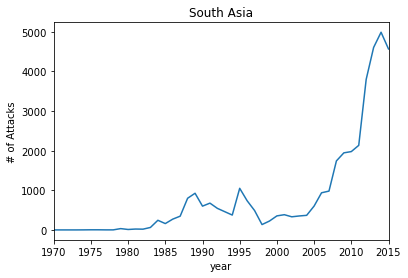

In [153]:
SAS.iyear.value_counts().sort_index(ascending=True).plot() #South Asia
plt.title("South Asia")
plt.xlabel('year')
plt.ylabel('# of Attacks')

In [17]:
High_Attack_Regions = [MENA, SAS]

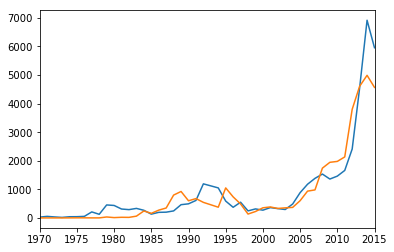

In [18]:
for x in High_Attack_Regions:
    x.iyear.value_counts().sort_index().plot()

In [19]:
for x in High_Attack_Regions:
    print x.attacktype1_txt.value_counts()

Bombing/Explosion                      24053
Armed Assault                           8057
Assassination                           3889
Hostage Taking (Kidnapping)             2029
Unknown                                 1133
Facility/Infrastructure Attack           920
Unarmed Assault                          144
Hijacking                                118
Hostage Taking (Barricade Incident)       79
Name: attacktype1_txt, dtype: int64
Bombing/Explosion                      18247
Armed Assault                           9750
Assassination                           3707
Hostage Taking (Kidnapping)             2653
Facility/Infrastructure Attack          1702
Unknown                                 1385
Unarmed Assault                          241
Hijacking                                 83
Hostage Taking (Barricade Incident)       73
Name: attacktype1_txt, dtype: int64


In [20]:
for x in High_Attack_Regions:
    print x.country_txt.value_counts()

Iraq                        18770
Turkey                       3557
Algeria                      2720
Yemen                        2598
Lebanon                      2413
Israel                       2085
West Bank and Gaza Strip     1990
Egypt                        1799
Libya                        1643
Syria                        1468
Iran                          667
Saudi Arabia                  193
Bahrain                       182
Jordan                         92
Tunisia                        92
Kuwait                         74
Morocco                        36
United Arab Emirates           22
Qatar                           7
North Yemen                     6
Western Sahara                  5
South Yemen                     2
International                   1
Name: country_txt, dtype: int64
Pakistan       12768
India           9940
Afghanistan     9690
Sri Lanka       2982
Bangladesh      1513
Nepal            923
Maldives          17
Bhutan             6
Mauritius         

In [178]:
Iraq = GTD[GTD.country_txt == 'Iraq']
Syria = GTD[GTD.country_txt == 'Syria']

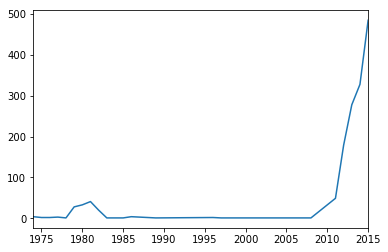

In [179]:
Syria.iyear.value_counts().sort_index(ascending=True).plot()
plt.title("Syria")
plt.xlabel('year')
plt.ylabel('# of Attacks')

(array([ -500.,     0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,
         3500.,  4000.,  4500.]), <a list of 11 Text yticklabel objects>)

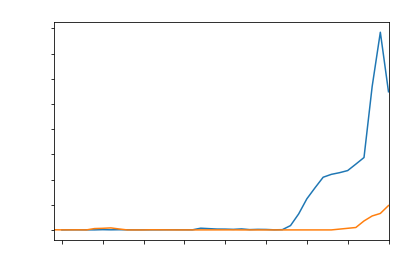

In [182]:
Iraq.iyear.value_counts().sort_index(ascending=True).plot()
Syria.iyear.value_counts().sort_index(ascending=True).plot()
plt.title("Iraq & Syria", color='w')
plt.xlabel('year', color='w')
plt.ylabel('# of Attacks', color='w')
plt.xticks(color='w')
plt.yticks(color='w')

In [24]:
Pakistan.city.value_counts()

Karachi                          2530
Peshawar                          737
Quetta                            690
Lahore                            209
Bara                              155
Jamrud                            154
Unknown                           154
Landi Kotal                       136
Bannu                             135
Islamabad                         131
Mohmand district                  131
Dera Bugti                        131
Hangu                             126
Bajaur district                   118
Dera Ismail Khan                  112
Miran Shah                        106
Rawalpindi                        103
Hyderabad                         102
Sui                                94
Kohat                              91
Shabqadar                          89
Khuzdar                            87
Turbat                             83
Orakzai district                   82
Kurram district                    78
Khyber district                    78
Chaman      

In [25]:
Karachi = Pakistan[Pakistan.city == 'Karachi']

In [26]:
Iraq.city.value_counts()

Baghdad                     6235
Mosul                       1553
Kirkuk                       852
Baqubah                      698
Fallujah                     494
Unknown                      460
Ramadi                       418
Tikrit                       377
Tuz Khormato                 263
Samarra                      253
Abu Ghraib                   239
Baiji                        233
Basra                        187
Madain                       178
Mahmudiyah                   165
Muqdadiyah                   156
Tarmiyah                     154
Taji                         151
Hillah                       136
Karbala                      120
Karma                        112
Balad                        107
Yusufiyah                    103
Iskandariyah                  95
Tal Afar                      89
Sadiyah                       82
Hawijah                       80
Khalis                        76
Shirqat                       75
Latifiyah                     74
Dujail    

In [162]:
Baghdad = Iraq[Iraq.city == 'Baghdad']
Mosul = Iraq[Iraq.city == 'Mosul']
Kirkuk = Iraq[Iraq.city == 'Kirkuk']
Baqubah = Iraq[Iraq.city == 'Baqubah']
Fallujah = Iraq[Iraq.city == 'Fallujah']

(array([ -200.,     0.,   200.,   400.,   600.,   800.,  1000.,  1200.]),
 <a list of 8 Text yticklabel objects>)

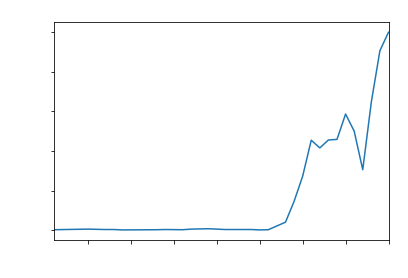

In [176]:
Baghdad.iyear.value_counts().sort_index(ascending=True).plot()
plt.title("Baghdad", color='w')
plt.xlabel('year', color='w')
plt.ylabel('# of Attacks', color='w')
plt.xticks(color='w')
plt.yticks(color='w')

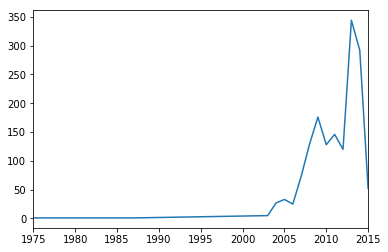

In [164]:
Mosul.iyear.value_counts().sort_index(ascending=True).plot()

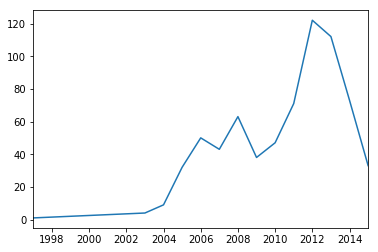

In [167]:
Baqubah.iyear.value_counts().sort_index(ascending=True).plot()

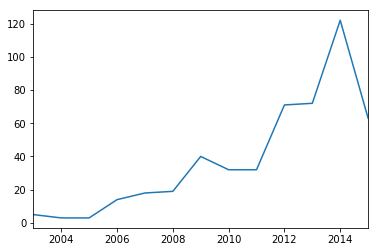

In [168]:
Fallujah.iyear.value_counts().sort_index(ascending=True).plot()

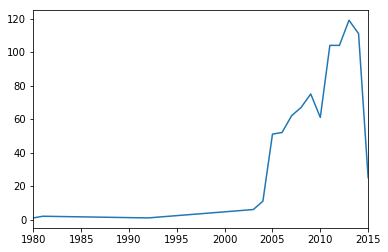

In [166]:
Kirkuk.iyear.value_counts().sort_index(ascending=True).plot()

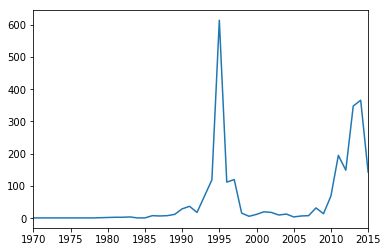

In [29]:
Karachi.iyear.value_counts().sort_index(ascending=True).plot()

In [30]:
Karachi.gname.value_counts()

Unknown                                       2061
Muttahida Qami Movement (MQM)                  165
Tehrik-i-Taliban Pakistan (TTP)                124
Gunmen                                          21
Lashkar-e-Jhangvi                               16
Tehrik-e-Khilafat                               13
Balochistan Liberation United Front (BLUF)       9
Sindhu Desh Liberation Army (SDLA)               9
Mohajir National Movement                        9
Sunni Muslims                                    8
Muslim Militants                                 7
Sipah-e-Sahaba/Pakistan (SSP)                    7
Jundallah                                        5
Iraqi Mujahideen                                 4
Sipah-I-Mohammed                                 4
Youths                                           4
Pakistani People's Party (PPP)                   3
Al-Qaida in the Indian Subcontinent              3
Khorasan Chapter of the Islamic State            3
Baloch Waja Liberation Army (BW

In [31]:
Baghdad.gname.value_counts()

Unknown                                                   5333
Islamic State of Iraq and the Levant (ISIL)                473
Al-Qaida in Iraq                                           214
Islamic State of Iraq (ISI)                                 57
Tawhid and Jihad                                            22
Gunmen                                                      15
Other                                                       14
Mahdi Army                                                  12
Muslim Fundamentalists                                       7
Asa'ib Ahl al-Haqq                                           7
Supreme Council for Islamic Revolution in Iraq (SCIRI)       6
Islamic Army in Iraq (al-Jaish al-Islami fi al-Iraq)         6
Mukhtar Army                                                 4
Ansar al-Islam                                               4
Ansar al-Sunna                                               4
Mujahedeen Shura Council                               

In [32]:
Karachi.attacktype1_txt.value_counts() #armed assault, assasination, bombing

Armed Assault                          1174
Assassination                           580
Bombing/Explosion                       558
Hostage Taking (Kidnapping)              68
Unarmed Assault                          54
Unknown                                  52
Facility/Infrastructure Attack           40
Hijacking                                 3
Hostage Taking (Barricade Incident)       1
Name: attacktype1_txt, dtype: int64

In [33]:
Baghdad.attacktype1_txt.value_counts() #bombing, armed assault, assasination

Bombing/Explosion                      5088
Armed Assault                           643
Assassination                           345
Hostage Taking (Kidnapping)             123
Unknown                                  18
Facility/Infrastructure Attack           13
Hostage Taking (Barricade Incident)       3
Unarmed Assault                           1
Hijacking                                 1
Name: attacktype1_txt, dtype: int64

In [34]:
Armed = GTD[GTD.attacktype1_txt == 'Armed Assault']
Bombing = GTD[GTD.attacktype1_txt == 'Bombing/Explosion']
Assassination = GTD[GTD.attacktype1_txt == 'Assassination']

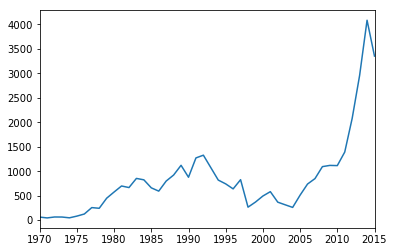

In [35]:
Armed.iyear.value_counts().sort_index(ascending = True).plot()

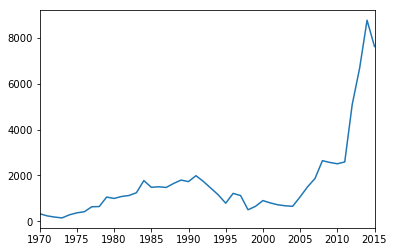

In [36]:
Bombing.iyear.value_counts().sort_index(ascending = True).plot()

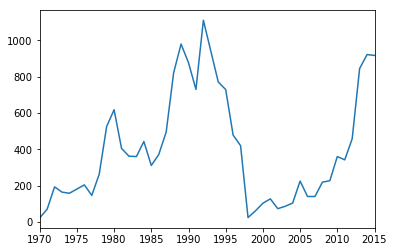

In [37]:
Assassination.iyear.value_counts().sort_index(ascending = True).plot()

In [38]:
Assassination.country_txt.value_counts() #interesting UK & Colombia have the most assassinations over all years

United Kingdom                      1642
Colombia                            1328
Pakistan                            1256
Iraq                                1181
India                               1104
Peru                                 999
Philippines                          840
Afghanistan                          712
Spain                                599
Guatemala                            510
El Salvador                          449
South Africa                         439
Sri Lanka                            437
Algeria                              431
Turkey                               412
Lebanon                              341
Yemen                                337
West Bank and Gaza Strip             329
Somalia                              289
Russia                               245
Egypt                                235
Italy                                205
Israel                               188
Libya                                166
France          

In [39]:
GTD.iyear.value_counts().sort_index(ascending=True)

1970      651
1971      470
1972      494
1973      473
1974      580
1975      740
1976      923
1977     1319
1978     1526
1979     2661
1980     2663
1981     2585
1982     2545
1983     2870
1984     3494
1985     2915
1986     2860
1987     3184
1988     3721
1989     4322
1990     3887
1991     4683
1992     5073
1994     3458
1995     3081
1996     3056
1997     3200
1998      933
1999     1396
2000     1813
2001     1908
2002     1332
2003     1262
2004     1161
2005     2011
2006     2751
2007     3241
2008     4787
2009     4721
2010     4821
2011     5067
2012     8498
2013    11990
2014    16840
2015    14806
Name: iyear, dtype: int64

In [2]:
nineteenseventy = GTD[GTD.iyear == 1970]
nineteenseventyone = GTD[GTD.iyear == 1971]
nineteenseventytwo = GTD[GTD.iyear == 1972]
nineteenseventythree = GTD[GTD.iyear == 1973]
nineteenseventyfour = GTD[GTD.iyear == 1974]
nineteenseventyfive = GTD[GTD.iyear == 1975]
nineteenseventysix = GTD[GTD.iyear == 1976]
nineteenseventyseven = GTD[GTD.iyear == 1977]
nineteenseventyeight = GTD[GTD.iyear == 1978]
nineteenseventynine = GTD[GTD.iyear == 1979]
nineteeneighty = GTD[GTD.iyear == 1980]
nineteeneightyone = GTD[GTD.iyear == 1981]
nineteeneightytwo = GTD[GTD.iyear == 1982]
nineteeneightythree = GTD[GTD.iyear == 1983]
nineteeneightyfour = GTD[GTD.iyear == 1984]
nineteeneightyfive = GTD[GTD.iyear == 1985]
nineteeneightysix = GTD[GTD.iyear == 1986]
nineteeneightyseven = GTD[GTD.iyear == 1987]
nineteeneightyeight = GTD[GTD.iyear == 1988]
nineteeneightynine = GTD[GTD.iyear == 1989]
nineteenninety = GTD[GTD.iyear == 1990]
nineteenninetyone = GTD[GTD.iyear == 1991]
nineteenninetytwo = GTD[GTD.iyear == 1992]
nineteenninetythree = GTD[GTD.iyear == 1993]
nineteenninetyfour = GTD[GTD.iyear == 1994]
nineteenninetyfive = GTD[GTD.iyear == 1995]
nineteenninetysix = GTD[GTD.iyear == 1996]
nineteenninetyseven = GTD[GTD.iyear == 1997]
nineteenninetyeight = GTD[GTD.iyear == 1998]
nineteenninetynine = GTD[GTD.iyear == 1999]
twothousand = GTD[GTD.iyear == 2000]
twothousandone = GTD[GTD.iyear == 2001]
twothousandtwo = GTD[GTD.iyear == 2002]
twothousandthree = GTD[GTD.iyear == 2003]
twothousandfour = GTD[GTD.iyear == 2004]
twothousandfive = GTD[GTD.iyear == 2005]
twothousandsix = GTD[GTD.iyear == 2006]
twothousandseven = GTD[GTD.iyear == 2007]
twothousandeight = GTD[GTD.iyear == 2008]
twothousandnine = GTD[GTD.iyear == 2009]
twothousandten = GTD[GTD.iyear == 2010]
twothousandeleven = GTD[GTD.iyear == 2011]
twothousandtwelve = GTD[GTD.iyear == 2012]
twothousandthirteen = GTD[GTD.iyear == 2013]
twothousandfourteen = GTD[GTD.iyear == 2014]
twothousandfifteen = GTD[GTD.iyear == 2015]

In [125]:

def attacks_by_year(dataframe):
    all_attacks = dataframe.groupby('attacktype1_txt').country_txt.value_counts().sum()
    print "countries: ", all_attacks #all countries
    print "bombings per country: ", dataframe[dataframe.attacktype1_txt == 'Bombing/Explosion'].country_txt.value_counts()
    print "bombings: ", len(dataframe[dataframe.attacktype1_txt == 'Bombing/Explosion'])
    print "total attacks: ", len(dataframe.attacktype1_txt.value_counts())

In [42]:
attacks_by_year(nineteenseventy) #left-wing militants, black nationalists, student radicals (Vietnam war)

Iraq : Series([], Name: country_txt, dtype: int64)
Syria : Series([], Name: country_txt, dtype: int64)
countries:  United States         468
Uruguay                33
Argentina              21
West Germany (FRG)     20
East Germany (GDR)     12
Turkey                 12
United Kingdom         12
Philippines            10
Jordan                  9
Brazil                  6
Name: country_txt, dtype: int64
assasinations:  22
armed assaults:  61
bombings:  333


In [43]:
attacks_by_year(nineteenseventyone) #Vietnam war protestors, Irish Civil War, Turkish military coup

Iraq : Series([], Name: country_txt, dtype: int64)
Syria : Series([], Name: country_txt, dtype: int64)
countries:  United States         247
United Kingdom         81
Turkey                 35
Spain                  22
West Germany (FRG)     13
Iran                   11
Uruguay                 8
Argentina               7
Jordan                  5
Philippines             4
Name: country_txt, dtype: int64
assasinations:  70
armed assaults:  44
bombings:  238


In [44]:
attacks_by_year(nineteenseventytwo) #Irish civil war dominates

Iraq : Series([], Name: country_txt, dtype: int64)
Syria : Series([], Name: country_txt, dtype: int64)
countries:  United Kingdom        283
United States          64
West Germany (FRG)     24
Spain                  19
Argentina              15
Iran                   15
Turkey                  9
France                  9
Philippines             7
Ireland                 5
Name: country_txt, dtype: int64
assasinations:  193
armed assaults:  63
bombings:  186


In [45]:
attacks_by_year(nineteenseventythree) #Irish civil war continues, dirty war in Argentina, protestor violence in US

Iraq : Series([], Name: country_txt, dtype: int64)
Syria : Series([], Name: country_txt, dtype: int64)
countries:  United Kingdom        189
Argentina              60
United States          58
West Germany (FRG)     27
Spain                  21
Italy                  15
France                 14
Greece                 11
Lebanon                11
Chile                   7
Name: country_txt, dtype: int64
assasinations:  164
armed assaults:  62
bombings:  149


In [46]:
attacks_by_year(nineteenseventyfour) #Irish Civil War, U.S. violence, the "dirty war" of Argentina

Iraq : Series([], Name: country_txt, dtype: int64)
Syria : Syria    4
Name: country_txt, dtype: int64
countries:  United Kingdom        202
United States          94
Argentina              71
France                 29
West Germany (FRG)     28
Italy                  22
Mexico                 16
Spain                  14
Israel                 12
Iran                   11
Name: country_txt, dtype: int64
assasinations:  158
armed assaults:  46
bombings:  284


In [47]:
attacks_by_year(nineteenseventyfive) #IRA attacks continue, 
#violence increases in U.S., Franco dies in Spain leading to terrorism by right and left-wing extremists

Iraq : Iraq    1
Name: country_txt, dtype: int64
Syria : Syria    2
Name: country_txt, dtype: int64
countries:  United Kingdom        194
United States         149
Spain                 136
France                 39
Argentina              38
West Germany (FRG)     35
Lebanon                15
Iran                   13
Japan                  12
Turkey                 10
Name: country_txt, dtype: int64
assasinations:  181
armed assaults:  81
bombings:  370


In [48]:
attacks_by_year(nineteenseventysix) #IRA attacks continue 
#left/right wing terrorism incidents in Italy

Iraq : Iraq    3
Name: country_txt, dtype: int64
Syria : Syria    2
Name: country_txt, dtype: int64
countries:  United Kingdom        194
Italy                 174
United States         105
France                 58
Argentina              54
Spain                  50
West Germany (FRG)     50
Turkey                 35
Colombia               22
Greece                 21
Name: country_txt, dtype: int64
assasinations:  204
armed assaults:  124
bombings:  419


In [49]:
attacks_by_year(nineteenseventyseven) #Years of lead continue in Italy, Taksim square massacre in Turkey, 
#political terror in Spain, Hanafi Siege in U.S., Irish attacks continue

Iraq : Series([], Name: country_txt, dtype: int64)
Syria : Syria    3
Name: country_txt, dtype: int64
countries:  Italy                 308
Turkey                189
Spain                 147
United Kingdom        140
United States         130
Colombia               80
France                 53
Greece                 47
West Germany (FRG)     40
Mexico                 19
Name: country_txt, dtype: int64
assasinations:  146
armed assaults:  255
bombings:  635


In [50]:
attacks_by_year(nineteenseventyeight) #Italian years of lead, Spanish far-right terrorism, FARC in Colombia, 
#Irish attacks continue

Iraq : Series([], Name: country_txt, dtype: int64)
Syria : Syria    1
Name: country_txt, dtype: int64
countries:  Italy             277
Spain             209
Colombia          158
United Kingdom    100
El Salvador        91
United States      87
Nicaragua          76
France             59
Turkey             52
Greece             39
Name: country_txt, dtype: int64
assasinations:  263
armed assaults:  241
bombings:  644


In [51]:
attacks_by_year(nineteenseventynine) #Salvadoran Civil War, Spanish far-right terrorism, IRA attacks in UK
#radical leftists in France, Italian years of lead, US-funded right-wing contras in Nicaragua, right-wing Turkish deathsquads,
#FARC in Colombia, Israeli Palestinian conflict


Iraq : Iraq    2
Name: country_txt, dtype: int64
Syria : Syria    28
Name: country_txt, dtype: int64
countries:  El Salvador       326
Spain             279
United Kingdom    238
France            212
Italy             209
Nicaragua         206
Turkey            141
Colombia          140
Israel            130
Iran               82
Name: country_txt, dtype: int64
assasinations:  526
armed assaults:  447
bombings:  1057


In [52]:
attacks_by_year(nineteeneighty) #Salvadoran Civil War, Guatemalan Civil War, Neofascist terrorism in Spain,
#Colombian drug war contines, IRA attacks in the UK #Italian years of lead

Iraq : Iraq    6
Name: country_txt, dtype: int64
Syria : Syria    33
Name: country_txt, dtype: int64
countries:  El Salvador       710
Guatemala         281
Spain             187
Colombia          141
United Kingdom    135
Italy             110
Turkey             95
France             94
Lebanon            86
Israel             79
Name: country_txt, dtype: int64
assasinations:  618
armed assaults:  574
bombings:  997


In [53]:
attacks_by_year(nineteeneightyone) #Salvadoran Civil War, Colombian drug war, Paquisha War in Peru, IRA in UK
#Iran hostage crisis, neofascist terror in Spain

Iraq : Iraq    3
Name: country_txt, dtype: int64
Syria : Syria    41
Name: country_txt, dtype: int64
countries:  El Salvador       664
Guatemala         399
Colombia          172
Peru              149
United Kingdom    143
Iran              108
Spain             107
Lebanon            81
United States      73
Italy              69
Name: country_txt, dtype: int64
assasinations:  405
armed assaults:  697
bombings:  1082


In [54]:
attacks_by_year(nineteeneightytwo) #Salvadoran Civil War, Guatamalen Civil War, Paquisha War in Peru, Colombian drug war
#Neofascism in Spain, Lebanon War (Israel invades)

Iraq : Iraq    5
Name: country_txt, dtype: int64
Syria : Syria    20
Name: country_txt, dtype: int64
countries:  El Salvador       537
Guatemala         354
Peru              350
Colombia          222
Spain             146
Lebanon           120
United Kingdom     95
United States      78
Israel             71
Nicaragua          63
Name: country_txt, dtype: int64
assasinations:  362
armed assaults:  665
bombings:  1125


In [55]:
attacks_by_year(nineteeneightythree) #internal conflict in Peru (guerilla war), Salvadoran Civil War, 
#contras in Nicaragua, Lebanon war, Colombia guerilla conflicts continue, IRA bombings in UK, neofascism in Spain, 
#Armenian nationalists in France, Guatemalan civil war, left-wing terrorism in Chile

Iraq : Iraq    3
Name: country_txt, dtype: int64
Syria : Syria    1
Name: country_txt, dtype: int64
countries:  Peru              536
El Salvador       371
Nicaragua         299
Lebanon           234
Colombia          234
United Kingdom    177
Spain             122
France            121
Guatemala         117
Chile             106
Name: country_txt, dtype: int64
assasinations:  360
armed assaults:  852
bombings:  1246


In [56]:
attacks_by_year(nineteeneightyfour) #south/central American conflicts continue, Lebanon war continues,
#political violence in Europe continues, Sikh militants in India

Iraq : Iraq    2
Name: country_txt, dtype: int64
Syria : Syria    1
Name: country_txt, dtype: int64
countries:  Peru              592
Chile             563
Nicaragua         302
El Salvador       273
Colombia          237
Lebanon           166
India             159
France            145
United Kingdom    145
Spain             143
Name: country_txt, dtype: int64
assasinations:  443
armed assaults:  823
bombings:  1775


In [57]:
attacks_by_year(nineteeneightyfive) #Salvadoran civil war, continued conflict in South/Central America,
#communist party becomes active in the Philippines, Tamil Liberation Tigers in Sri Lanka
#violence by the ruling party during Apartheid in South Africa

Iraq : Series([], Name: country_txt, dtype: int64)
Syria : Syria    1
Name: country_txt, dtype: int64
countries:  El Salvador     436
Colombia        382
Peru            352
Nicaragua       258
Chile           232
Philippines     124
Spain           113
Sri Lanka       110
France          107
South Africa    106
Name: country_txt, dtype: int64
assasinations:  311
armed assaults:  659
bombings:  1482


In [58]:
attacks_by_year(nineteeneightysix) #established terrorist groups continue

Iraq : Series([], Name: country_txt, dtype: int64)
Syria : Syria    4
Name: country_txt, dtype: int64
countries:  Peru            568
Colombia        307
Chile           243
El Salvador     175
Nicaragua       171
South Africa    159
Sri Lanka       142
Spain           125
Lebanon         106
India            96
Name: country_txt, dtype: int64
assasinations:  371
armed assaults:  592
bombings:  1506


In [59]:
attacks_by_year(nineteeneightyseven) #established terrorist gorups continue

Iraq : Iraq    3
Name: country_txt, dtype: int64
Syria : Series([], Name: country_txt, dtype: int64)
countries:  Peru              627
Colombia          337
El Salvador       234
Nicaragua         223
Chile             173
India             166
Philippines       160
South Africa      133
United Kingdom    118
Sri Lanka         115
Name: country_txt, dtype: int64
assasinations:  495
armed assaults:  798
bombings:  1476


In [60]:
attacks_by_year(nineteeneightyeight) #established terrorist groups continue

Iraq : Iraq    4
Name: country_txt, dtype: int64
Syria : Series([], Name: country_txt, dtype: int64)
countries:  Colombia          427
El Salvador       367
India             358
Peru              355
Sri Lanka         350
South Africa      245
Philippines       210
Chile             185
United Kingdom    181
Spain             151
Name: country_txt, dtype: int64
assasinations:  821
armed assaults:  921
bombings:  1650


In [61]:
attacks_by_year(nineteeneightynine) #established terrorist groups continue

Iraq : Iraq    4
Name: country_txt, dtype: int64
Syria : Syria    1
Name: country_txt, dtype: int64
countries:  Peru              630
Sri Lanka         510
Colombia          492
El Salvador       356
India             324
United Kingdom    163
Philippines       156
South Africa      149
Chile             146
Spain             142
Name: country_txt, dtype: int64
assasinations:  980
armed assaults:  1120
bombings:  1797


In [62]:
attacks_by_year(nineteenninety) #Angola civil war & conflicts between Turks and Kurds in Turkey

Iraq : Series([], Name: country_txt, dtype: int64)
Syria : Series([], Name: country_txt, dtype: int64)
countries:  Peru              495
Colombia          349
India             349
Philippines       320
Angola            205
Turkey            195
El Salvador       184
Chile             161
South Africa      154
United Kingdom    147
Name: country_txt, dtype: int64
assasinations:  877
armed assaults:  876
bombings:  1731


In [63]:
attacks_by_year(nineteenninetyone) #enforcement of Shari'ah law begins in Pakistan

Iraq : Iraq    3
Name: country_txt, dtype: int64
Syria : Series([], Name: country_txt, dtype: int64)
countries:  Peru              658
El Salvador       500
Colombia          420
India             339
Turkey            293
United Kingdom    262
Philippines       162
Pakistan          150
France            137
South Africa      127
Name: country_txt, dtype: int64
assasinations:  730
armed assaults:  1271
bombings:  1988


In [126]:
attacks_by_year(nineteenninetytwo) #Algerian civil war following a coup negating an Islamist electoral victory 
#and in Germany, neo-nazi attacks and members of the Kurdistan Workers' Party (PKK)

countries:  5073
bombings per country:  Colombia                    307
Peru                        201
United Kingdom              119
Turkey                      104
France                       91
Chile                        89
Philippines                  62
India                        57
Lebanon                      48
Spain                        40
Algeria                      33
South Africa                 32
Argentina                    30
Bolivia                      29
Pakistan                     28
Sri Lanka                    27
Guatemala                    27
Cambodia                     21
Panama                       21
Georgia                      18
Greece                       17
Togo                         17
Italy                        15
Japan                        15
Yemen                        14
Afghanistan                  13
Ecuador                      12
Israel                       12
West Bank and Gaza Strip     12
Thailand                     11


In [79]:
attacks_by_year(nineteenninetythree)

Iraq : Series([], Name: country_txt, dtype: int64)
Syria : Series([], Name: country_txt, dtype: int64)
countries:  Series([], Name: country_txt, dtype: int64)
assasinations:  0
armed assaults:  0
bombings:  0


In [127]:
attacks_by_year(nineteenninetyfour) 
#west bank and gaza strip, Egypt

countries:  3458
bombings per country:  Turkey                      141
Colombia                     91
United Kingdom               90
France                       67
Peru                         55
Bangladesh                   51
Guatemala                    51
Lebanon                      48
India                        42
Spain                        33
South Africa                 32
Greece                       29
Iran                         28
West Bank and Gaza Strip     22
Russia                       22
Pakistan                     20
Philippines                  19
Sri Lanka                    18
Thailand                     16
Algeria                      13
Israel                       13
Chile                        12
Iraq                         11
Tajikistan                   11
Egypt                        10
Argentina                     9
Mexico                        9
Cambodia                      9
Georgia                       8
United States                 8


In [67]:
attacks_by_year(nineteenninetyfive)

Iraq : Iraq    17
Name: country_txt, dtype: int64
Syria : Series([], Name: country_txt, dtype: int64)
countries:  Pakistan     666
Algeria      185
India        179
Germany      147
Turkey       133
Sri Lanka    126
Colombia     123
Egypt        102
Burundi       83
Guatemala     82
Name: country_txt, dtype: int64
assasinations:  729
armed assaults:  740
bombings:  791


In [68]:
attacks_by_year(nineteenninetysix)

Iraq : Iraq    12
Name: country_txt, dtype: int64
Syria : Syria    2
Name: country_txt, dtype: int64
countries:  Colombia      409
France        270
India         211
Pakistan      180
Sri Lanka     176
Bangladesh    161
Algeria       129
Mexico         75
Russia         66
Indonesia      65
Name: country_txt, dtype: int64
assasinations:  478
armed assaults:  638
bombings:  1217


In [69]:
attacks_by_year(nineteenninetyseven)

Iraq : Iraq    21
Name: country_txt, dtype: int64
Syria : Syria    1
Name: country_txt, dtype: int64
countries:  Colombia          598
Algeria           344
Pakistan          206
India             193
France            130
Mexico             95
Spain              86
Burundi            79
United Kingdom     78
Russia             77
Name: country_txt, dtype: int64
assasinations:  420
armed assaults:  826
bombings:  1123


In [70]:
attacks_by_year(nineteenninetyeight)

Iraq : Iraq    7
Name: country_txt, dtype: int64
Syria : Syria    1
Name: country_txt, dtype: int64
countries:  Algeria           151
Colombia           94
United Kingdom     63
India              61
Yugoslavia         46
Pakistan           37
Sri Lanka          35
United States      30
Greece             28
Russia             26
Name: country_txt, dtype: int64
assasinations:  24
armed assaults:  264
bombings:  504


In [71]:
attacks_by_year(nineteenninetynine)

Iraq : Iraq    12
Name: country_txt, dtype: int64
Syria : Series([], Name: country_txt, dtype: int64)
countries:  Colombia          116
India             112
Turkey            109
Algeria           106
United Kingdom     76
Indonesia          61
Russia             54
United States      53
Spain              47
Sri Lanka          46
Name: country_txt, dtype: int64
assasinations:  61
armed assaults:  368
bombings:  652


In [72]:
attacks_by_year(twothousand)

Iraq : Iraq    10
Name: country_txt, dtype: int64
Syria : Series([], Name: country_txt, dtype: int64)
countries:  India             179
Russia            138
Algeria           138
Colombia          137
Philippines       132
Spain             112
Indonesia         101
Sri Lanka          68
United Kingdom     61
Kosovo             60
Name: country_txt, dtype: int64
assasinations:  103
armed assaults:  492
bombings:  904


In [73]:
attacks_by_year(twothousandone)

Iraq : Iraq    3
Name: country_txt, dtype: int64
Syria : Series([], Name: country_txt, dtype: int64)
countries:  India                       234
Colombia                    207
Russia                      135
West Bank and Gaza Strip    123
Algeria                     113
Indonesia                   105
United Kingdom               94
Israel                       79
Spain                        79
Macedonia                    67
Name: country_txt, dtype: int64
assasinations:  127
armed assaults:  581
bombings:  802


In [74]:
attacks_by_year(twothousandtwo)

Iraq : Iraq    6
Name: country_txt, dtype: int64
Syria : Series([], Name: country_txt, dtype: int64)
countries:  India                       182
Colombia                    150
Algeria                     132
Russia                       89
West Bank and Gaza Strip     86
Israel                       75
Nepal                        58
Philippines                  48
Pakistan                     46
Indonesia                    43
Name: country_txt, dtype: int64
assasinations:  73
armed assaults:  366
bombings:  721


In [75]:
attacks_by_year(twothousandthree)

Iraq : Iraq    87
Name: country_txt, dtype: int64
Syria : Series([], Name: country_txt, dtype: int64)
countries:  India                       196
Philippines                 107
Afghanistan                 100
Colombia                     98
Iraq                         87
Russia                       76
Algeria                      75
West Bank and Gaza Strip     45
Israel                       38
France                       34
Name: country_txt, dtype: int64
assasinations:  86
armed assaults:  312
bombings:  678


In [76]:
attacks_by_year(twothousandfour)

Iraq : Iraq    319
Name: country_txt, dtype: int64
Syria : Syria    1
Name: country_txt, dtype: int64
countries:  Iraq                        319
India                       108
Afghanistan                  88
Pakistan                     67
Algeria                      67
Nepal                        62
Thailand                     44
Russia                       43
Colombia                     37
West Bank and Gaza Strip     34
Name: country_txt, dtype: int64
assasinations:  104
armed assaults:  259
bombings:  655


In [77]:
attacks_by_year(twothousandfive)

Iraq : Iraq    618
Name: country_txt, dtype: int64
Syria : Series([], Name: country_txt, dtype: int64)
countries:  Iraq           618
Afghanistan    155
Thailand       155
India          145
Sri Lanka      133
Algeria        104
Pakistan        78
Nepal           70
Russia          63
Israel          43
Name: country_txt, dtype: int64
assasinations:  225
armed assaults:  510
bombings:  1064


In [78]:
attacks_by_year(twothousandsix)

Iraq : Iraq    837
Name: country_txt, dtype: int64
Syria : Syria    1
Name: country_txt, dtype: int64
countries:  Iraq           837
Afghanistan    282
Sri Lanka      217
Thailand       202
India          167
Pakistan       164
Algeria        152
Nepal           83
Israel          78
Philippines     58
Name: country_txt, dtype: int64
assasinations:  140
armed assaults:  737
bombings:  1502


In [79]:
attacks_by_year(twothousandseven)

Iraq : Iraq    1047
Name: country_txt, dtype: int64
Syria : Series([], Name: country_txt, dtype: int64)
countries:  Iraq                        1047
Afghanistan                  340
Thailand                     292
Pakistan                     260
Somalia                      156
India                        149
Sri Lanka                    132
Algeria                      124
Nepal                         90
West Bank and Gaza Strip      88
Name: country_txt, dtype: int64
assasinations:  140
armed assaults:  848
bombings:  1865


In [80]:
attacks_by_year(twothousandeight)

Iraq : Iraq    1104
Name: country_txt, dtype: int64
Syria : Syria    1
Name: country_txt, dtype: int64
countries:  Iraq           1104
Pakistan        567
India           516
Afghanistan     415
Philippines     275
Thailand        200
Somalia         172
Russia          170
Israel          134
Colombia        133
Name: country_txt, dtype: int64
assasinations:  219
armed assaults:  1093
bombings:  2642


In [81]:
attacks_by_year(twothousandnine)

Iraq : Iraq    1137
Name: country_txt, dtype: int64
Syria : Series([], Name: country_txt, dtype: int64)
countries:  Iraq           1137
India           673
Pakistan        667
Afghanistan     502
Thailand        298
Philippines     230
Russia          152
Colombia        139
Somalia         122
Greece          115
Name: country_txt, dtype: int64
assasinations:  227
armed assaults:  1118
bombings:  2565


In [82]:
attacks_by_year(twothousandten)

Iraq : Iraq    1179
Name: country_txt, dtype: int64
Syria : Series([], Name: country_txt, dtype: int64)
countries:  Iraq           1179
Pakistan        713
India           661
Afghanistan     541
Thailand        253
Russia          251
Philippines     205
Colombia        136
Somalia         129
Yemen           112
Name: country_txt, dtype: int64
assasinations:  360
armed assaults:  1114
bombings:  2507


In [83]:
attacks_by_year(twothousandeleven)

Iraq : Iraq    1307
Name: country_txt, dtype: int64
Syria : Syria    49
Name: country_txt, dtype: int64
countries:  Iraq           1307
Pakistan       1011
India           643
Afghanistan     421
Russia          188
Somalia         185
Thailand        181
Nigeria         175
Philippines     149
Yemen           118
Name: country_txt, dtype: int64
assasinations:  342
armed assaults:  1391
bombings:  2587


In [84]:
attacks_by_year(twothousandtwelve)

Iraq : Iraq    1438
Name: country_txt, dtype: int64
Syria : Syria    179
Name: country_txt, dtype: int64
countries:  Pakistan       1652
Afghanistan    1469
Iraq           1438
Nigeria         616
India           611
Somalia         318
Yemen           312
Thailand        279
Philippines     247
Turkey          189
Name: country_txt, dtype: int64
assasinations:  458
armed assaults:  2081
bombings:  5080


In [85]:
attacks_by_year(twothousandthirteen)

Iraq : Iraq    2849
Name: country_txt, dtype: int64
Syria : Syria    278
Name: country_txt, dtype: int64
countries:  Iraq           2849
Pakistan       2213
Afghanistan    1441
India           694
Philippines     651
Thailand        471
Yemen           424
Nigeria         345
Somalia         334
Egypt           315
Name: country_txt, dtype: int64
assasinations:  845
armed assaults:  2959
bombings:  6669


In [86]:
attacks_by_year(twothousandfourteen)

Iraq : Iraq    3925
Name: country_txt, dtype: int64
Syria : Syria    328
Name: country_txt, dtype: int64
countries:  Iraq           3925
Pakistan       2147
Afghanistan    1820
Ukraine         891
Somalia         862
India           860
Yemen           761
Libya           730
Nigeria         713
Philippines     597
Name: country_txt, dtype: int64
assasinations:  922
armed assaults:  4087
bombings:  8759


In [87]:
attacks_by_year(twothousandfifteen)

Iraq : Iraq    2743
Name: country_txt, dtype: int64
Syria : Syria    485
Name: country_txt, dtype: int64
countries:  Iraq           2743
Afghanistan    1926
Pakistan       1235
India           882
Philippines     717
Yemen           668
Ukraine         637
Nigeria         637
Egypt           582
Libya           542
Name: country_txt, dtype: int64
assasinations:  917
armed assaults:  3353
bombings:  7615


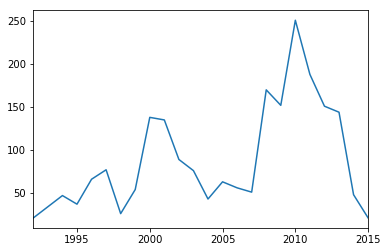

In [88]:
GTD[GTD.country_txt == 'Russia'].iyear.value_counts().sort_index(ascending=True).plot()

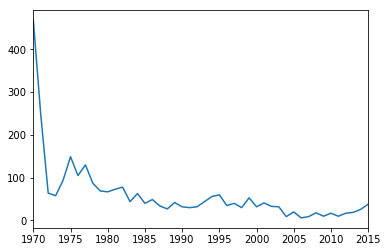

In [89]:
GTD[GTD.country_txt == 'United States'].iyear.value_counts().sort_index(ascending=True).plot()

In [90]:
ISIS = GTD[GTD.gname == 'Islamic State of Iraq and the Levant (ISIL)']

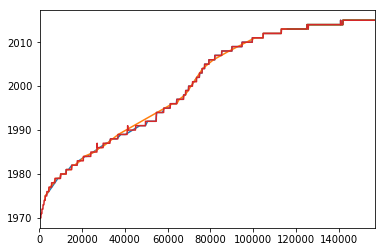

In [91]:
Iraq = GTD[GTD.country_txt == 'Iraq']
Syria = GTD[GTD.country_txt == 'Syria']
Iraq.iyear.plot()
Syria.iyear.plot()
ISIS.iyear.plot()
MENA.iyear.plot() #middle east

In [92]:
GTD[GTD.iyear == 2008].region_txt.value_counts() #4787 attacks total, MENA ccounts for 32% of all attacks

South Asia                    1743
Middle East & North Africa    1535
Southeast Asia                 513
Sub-Saharan Africa             380
Eastern Europe                 209
Western Europe                 163
South America                  144
Central Asia                    36
North America                   31
East Asia                       25
Australasia & Oceania            8
Name: region_txt, dtype: int64

In [93]:
#construct a prior about the amount of terror a given area has seen
MENA[MENA.iyear == 2008].country_txt.value_counts() #1535 attacks total, Iraq accounts for 72% of all attacks

Iraq                        1104
Israel                       134
Algeria                      107
West Bank and Gaza Strip      64
Lebanon                       58
Turkey                        32
Yemen                         22
Iran                           8
Tunisia                        2
Syria                          1
Libya                          1
Egypt                          1
Bahrain                        1
Name: country_txt, dtype: int64

In [94]:
Iraq[Iraq.iyear == 2008].nkill.sum()

2863.0

In [95]:
Iraq[Iraq.iyear == 2015].nkill.sum()

8831.0

In [96]:
twothousandfourteen[twothousandfourteen.nkill > 100].region_txt.value_counts() #166 attacks that killed over 100 people #6774 killed more than 10
#there's a 2.5% chance that an attack will kill 100 people if it kills more than 10

Sub-Saharan Africa            14
Middle East & North Africa    11
Eastern Europe                 2
South Asia                     1
Name: region_txt, dtype: int64

In [97]:
twothousandfourteen.region_txt.value_counts() #16,840 total attacks

Middle East & North Africa     6917
South Asia                     4990
Sub-Saharan Africa             2306
Southeast Asia                 1075
Eastern Europe                  958
South America                   281
Western Europe                  214
East Asia                        42
North America                    34
Australasia & Oceania             9
Central Asia                      9
Central America & Caribbean       5
Name: region_txt, dtype: int64

In [98]:
#Probability a terror attack kills 100+ people given it's in a specific region =
1.probability it's in a region given it kill 100+ people * probability it kills 100 bunch of people
2. divided by probability it's in a specific region
P(SSA | 100) = 14/27 (51.9%)  * .01 / 2306/16840 (13.7%) = 3.8%
P(MENA | 100) = 11/27 (40.7%) * .01 / 6917/16840 (41.1%) = 1%
P (EE | 100) = 2/27 (7.4%) * .01 / 958/16840 (5.7%) = 1.3%
P (SA | 100) = 1/27 (3.7%) * .01 / 4990/16840 (29.6%) = .1%

SyntaxError: invalid syntax (<ipython-input-98-868a376c492b>, line 2)

In [99]:
#probability a terror attack is in a region given it kills 100+ people =
1. Probability a terror attack kills 100+ people given it's in a specific region * probability its in a region
2. divided by probability it kills a bunch of people
P(100 | SSA) = 14/2306 * 2306/16850 / .01 = 8.3%
p(100 | MENA) = 11/6917 * 6917/16850 / .01 = 6.5%
p(100 | EE) = 2/958  * 958/16850 / .01 = 1.2%
P(100 | SA) = 1/4990 * 4990/16840 / .01 = 0.5%
83.5% it won't be in any of those regions

SyntaxError: invalid syntax (<ipython-input-99-a6d68ed0ec9e>, line 2)

In [100]:
GTD[GTD.nkill > 100].region_txt.value_counts()

Sub-Saharan Africa             61
Middle East & North Africa     41
South Asia                     24
Central America & Caribbean    18
Eastern Europe                  8
North America                   5
Southeast Asia                  4
South America                   3
Western Europe                  1
East Asia                       1
Name: region_txt, dtype: int64

In [101]:
GTD.region_txt.value_counts() #156,772 attacks total

Middle East & North Africa     40422
South Asia                     37841
South America                  18628
Western Europe                 16020
Sub-Saharan Africa             13434
Southeast Asia                 10360
Central America & Caribbean    10337
Eastern Europe                  4892
North America                   3268
East Asia                        786
Central Asia                     538
Australasia & Oceania            246
Name: region_txt, dtype: int64

In [102]:
#Probability a terror attack kills 100+ people given it's in a specific region (all time) =
1.probability it's in a region given it kill 100+ people * probability it kills 100 bunch of people
2. divided by probability it's in a specific region
P(SSA | 100) = 61/166 (36.7%)  * .001 / 13434/156772 (8.6%) = .4%
P(MENA | 100) = 41/166 (24.7%) * .001 / 40422/156772 (25.7%) = .1%
P (SA | 100) = 24/166 (14.5%) * .001 / 37841/156772 (24.1%) = .06%
P (CAC | 100) = 18/166 (10.8%) * .001 / 10337/156772 (6.6%) = .2%
P (EE | 100) = 8/166 (4.8%) * .001 / 4892/156772 (3.1%) = .15%
P (NA | 100) = 5/166 (3.0%) * .001 / 3268/156772 (2.1%) = .14%
P (SEA | 100) = 4/166 (2.4%) * .001 / 10360/156772 (6.6%) = .04%
P (SAm | 100) = 3/166 (1.8%) * .001 / 18628/156772 (11.9%) = .02%
P (WE | 100) = 1/166 (0.6%) * .001 / 16020/156772 (10.2%) = .01%
P (EA | 100) = 1/166 (0.6%) * .001 / 786/156772 ((.05%)) = .12%

Sub-Saharan Africa             61
Middle East & North Africa     41
South Asia                     24
Central America & Caribbean    18
Eastern Europe                  8
North America                   5
Southeast Asia                  4
South America                   3
Western Europe                  1
East Asia                       1

#probability a terror attack is in a region given it kills 100+ people (all time) =
1. Probability a terror attack kills 100+ people given it's in a specific region * probability its in a region
2. divided by probability it kills a bunch of people
P(100 | SSA) = 61/13434  * 13434/156772 (8.6%) / .001 = 39%
P(100 |  MENA) = 41/40422 * 40422/156772 (25.7%) / .001 = 26%
P (100 | SA) = 24/37841  * 37841/156772 (24.1%) / .001 = 15%
P (100 | CAC) = 18/10337  * 10337/156772 (6.6%) / .001 = 11.5%
P (100 | EE) = 8/4892 * 4892/156772 (3.1%) / .001 = 5%
P (100 | NA) = 5/3268 * 3268/156772 (2.1%) / .001 = 3.2%
P (100 | SEA) = 4/10360 * 10360/156772 (6.6%) / .001 = 2.5%
P (100 | SAm) = 3/18628 * 18628/156772 (11.9%) / .001 = 1.9%
P (100 | WE) = 1/16020 * 16020/156772 (10.2%) / .001 = 0.6%
P (100 | EA) = 1/786 * 786/156772 ((.05%)) /  .001 = 0.6%



SyntaxError: invalid syntax (<ipython-input-102-2725da373255>, line 2)

In [103]:
GTD.region_txt.value_counts().sum()

156772

In [104]:
#update that prior with new information (like a new year of attacks or 
#a contrasting country from within the same region)

In [105]:
#You should compare two populations of your choosing using Bayesian inference

In [106]:
#We want to know if the amount of terror one area has seen differs in a 
#significant way than another area (or time period!)

In [107]:
#You must justify the prior you selected and interpret your results (use credible intervals.) 
#Remember you can attempt to use different priors (but don't "prior hack" to affect your output!)

In [ ]:
#10+ kills in a single attack in Iraq/ 10+ kills in a single attack in Syria in 2014

In [189]:
Iraq_2014 = twothousandfourteen[twothousandfourteen.country_txt == "Iraq"]
Iraq_2014_10plus = Iraq_2014[Iraq_2014.nkill > 10].nkill.values
print Iraq_2014_10plus.mean()
print Iraq_2014_10plus.std()

41.4523809524
130.50215787


In [191]:
Syria_2014 = twothousandfourteen[twothousandfourteen.country_txt == "Syria"]
Syria_2014_10plus = Syria_2014[Syria_2014.nkill > 10].nkill.values
print Syria_2014_10plus.mean()
print Syria_2014_10plus.std()

36.8378378378
68.5227213702


In [192]:
tenplusprior = GTD[GTD.iyear < 2014]
tenplusprior = tenplusprior[tenplusprior.nkill > 10]
tenplusprior_Iraq = tenplusprior[tenplusprior.country_txt == "Iraq"]
tenplusprior_Syria = tenplusprior[tenplusprior.country_txt == "Syria"]

In [193]:
prior_mean_Iraq = tenplusprior_Iraq.nkill.mean()
prior_std_Iraq = tenplusprior_Iraq.nkill.std()
prior_mean_Syria = tenplusprior_Syria.nkill.mean()
prior_std_Syria = tenplusprior_Syria.nkill.std()
print prior_mean_Iraq #in all years before 2014, if an attack killed more than 10, it killed 25 or 26 on avg 
#in both Iraq and Syria. Will the pattern hold for 2014?
print prior_std_Iraq
print prior_mean_Syria
print prior_std_Syria

26.2503506311
24.3789894693
25.2619047619
19.5564484466


In [194]:
import pymc3 as pm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# model specifications in PyMC3 are wrapped in a with-statement
with pm.Model() as model:

    Iraq_2014_10plus_mean = pm.Normal('Iraq_2014_10plus_mean', prior_mean_Iraq, sd=prior_std_Iraq)
    Syria_2014_10plus_mean = pm.Normal('Syria_2014_10plus_mean', prior_mean_Syria, sd=prior_std_Syria)

In [195]:
std_prior_lower = 0.01
std_prior_upper = 100.0

with model:
    
    Iraq_2014_10plus_std = pm.Uniform('Iraq_2014_10plus_std', lower=std_prior_lower, upper=std_prior_upper)
    Syria_2014_10plus_std = pm.Uniform('Syria_2014_10plus_std', lower=std_prior_lower, upper=std_prior_upper)

In [196]:
with model:

    Iraq10plus = pm.Normal('Iraq10plus', mu=Iraq_2014_10plus_mean, sd=Iraq_2014_10plus_std, observed=Iraq_2014_10plus)
    Syria10plus = pm.Normal('Syria10plus', mu=Syria_2014_10plus_mean, sd=Syria_2014_10plus_std, observed=Syria_2014_10plus)

In [197]:

with model:

    diff_of_means = pm.Deterministic('difference of means', Iraq_2014_10plus_mean - Syria_2014_10plus_mean)
    diff_of_stds = pm.Deterministic('difference of stds', Iraq_2014_10plus_std - Syria_2014_10plus_std)
    effect_size = pm.Deterministic('effect size',
                                   diff_of_means / np.sqrt((Iraq_2014_10plus_std**2 + Syria_2014_10plus_std**2) / 2))

In [198]:
with model:
    trace = pm.sample(25000, njobs=4)

Auto-assigning NUTS sampler...
Initializing NUTS using advi...
Average ELBO = -1,498.5: 100%|██████████| 200000/200000 [00:52<00:00, 3815.28it/s]
Finished [100%]: Average ELBO = -1,498.5
100%|██████████| 25000/25000 [03:36<00:00, 115.69it/s]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x15d4e0d10>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x15d8184d0>], dtype=object)

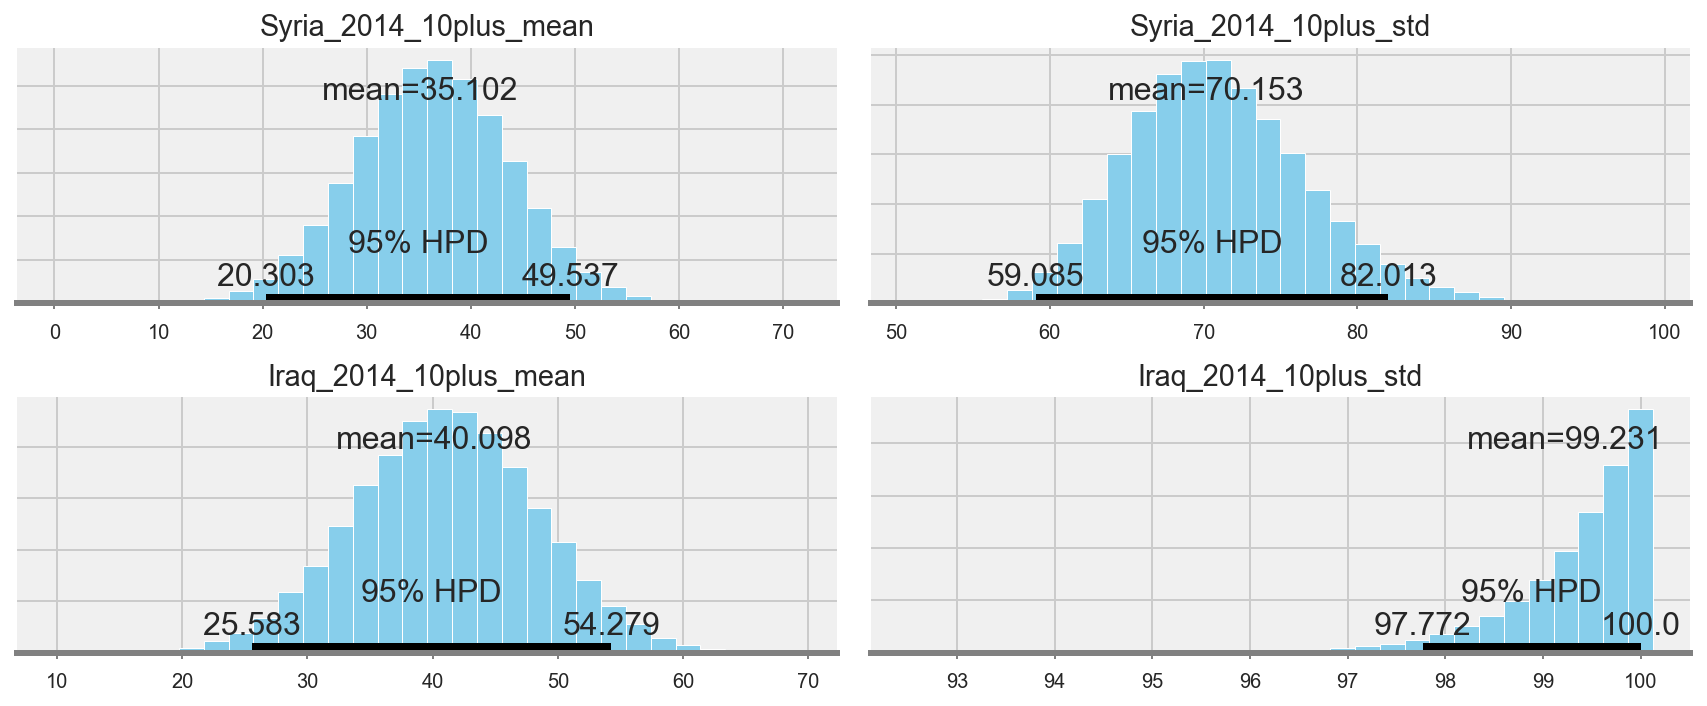

In [199]:
pm.plot_posterior(trace[3000:],
                  varnames=['Iraq_2014_10plus_mean', 'Syria_2014_10plus_mean', 'Iraq_2014_10plus_std', 'Syria_2014_10plus_std'],
                  color='#87ceeb') #35 and 40, attacks that kill more than 10 people in 2014 kill more people!

array([<matplotlib.axes._subplots.AxesSubplot object at 0x15d862f90>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x15b9028d0>], dtype=object)

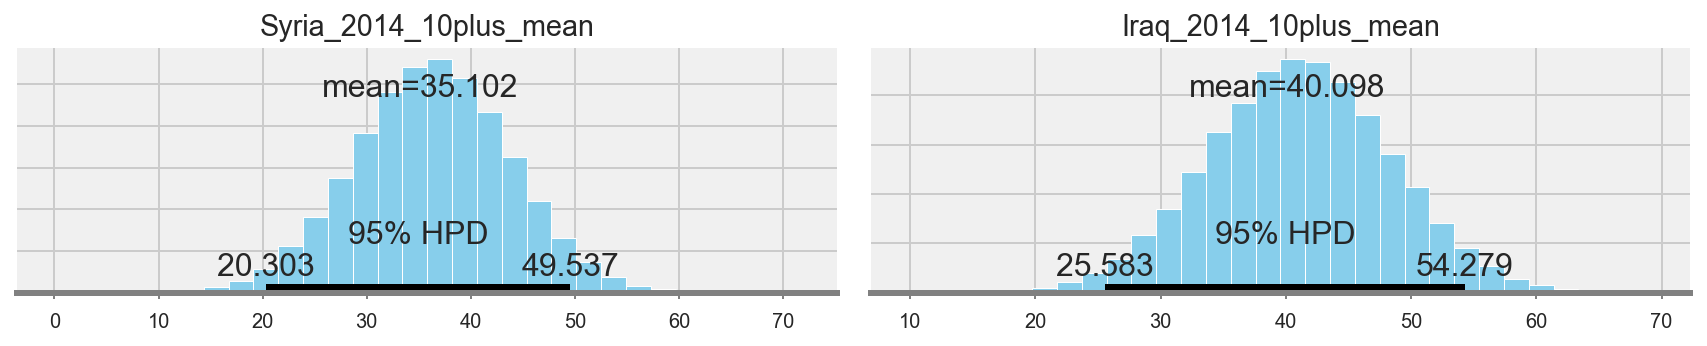

In [201]:
pm.plot_posterior(trace[3000:],
                  varnames=['Iraq_2014_10plus_mean', 'Syria_2014_10plus_mean'], color='#87ceeb')

In [ ]:
pm.plot_posterior(trace[3000:],
                  varnames=['difference of means', 'difference of stds', 'effect size'],
                  ref_val=0,
                  color='#87ceeb')

In [ ]:
pm.summary(trace[3000:],
           varnames=['difference of means', 'difference of stds', 'effect size'])

In [ ]:
#The year 1993 is missing from our dataset! Given there is a wealth of information across different types of attacks, 
#we will focus analysis on `attacktype1` bombings (category 3, as per the codebook)


In [38]:
years_sorted = GTD.iyear.value_counts().sort_index(ascending=True)

In [39]:
years_sorted

1970      651
1971      470
1972      494
1973      473
1974      580
1975      740
1976      923
1977     1319
1978     1526
1979     2661
1980     2663
1981     2585
1982     2545
1983     2870
1984     3494
1985     2915
1986     2860
1987     3184
1988     3721
1989     4322
1990     3887
1991     4683
1992     5073
1994     3458
1995     3081
1996     3056
1997     3200
1998      933
1999     1396
2000     1813
2001     1908
2002     1332
2003     1262
2004     1161
2005     2011
2006     2751
2007     3241
2008     4787
2009     4721
2010     4821
2011     5067
2012     8498
2013    11990
2014    16840
2015    14806
Name: iyear, dtype: int64

In [40]:
type(years_sorted)

pandas.core.series.Series

In [41]:
years_sorted.ix[1993] = ('None')

In [42]:
years_sorted = years_sorted.sort_index(ascending=True)

In [43]:
import numpy as np
x = np.array(years_sorted)

In [44]:
x

array([651, 470, 494, 473, 580, 740, 923, 1319, 1526, 2661, 2663, 2585,
       2545, 2870, 3494, 2915, 2860, 3184, 3721, 4322, 3887, 4683, 5073,
       'None', 3458, 3081, 3056, 3200, 933, 1396, 1813, 1908, 1332, 1262,
       1161, 2011, 2751, 3241, 4787, 4721, 4821, 5067, 8498, 11990, 16840,
       14806], dtype=object)

In [60]:
estimated_attacks_in_1993 = (5073 + 3458) / 2
print estimated_attacks_in_1993, "attacks"

4265 attacks


In [133]:
4265 * .338

1441.5700000000002

In [62]:
GTD.columns

Index([u'eventid', u'iyear', u'imonth', u'iday', u'approxdate', u'extended',
       u'resolution', u'country', u'country_txt', u'region',
       ...
       u'addnotes', u'scite1', u'scite2', u'scite3', u'dbsource', u'INT_LOG',
       u'INT_IDEO', u'INT_MISC', u'INT_ANY', u'related'],
      dtype='object', length=137)

In [76]:
GTD[GTD.attacktype1_txt == 'Bombing/Explosion'].iyear.value_counts().sort_index(ascending=True)

1970     333
1971     238
1972     186
1973     149
1974     284
1975     370
1976     419
1977     635
1978     644
1979    1057
1980     997
1981    1082
1982    1125
1983    1246
1984    1775
1985    1482
1986    1506
1987    1476
1988    1650
1989    1797
1990    1731
1991    1988
1992    1738
1994    1153
1995     791
1996    1217
1997    1123
1998     504
1999     652
2000     904
2001     802
2002     721
2003     678
2004     655
2005    1064
2006    1502
2007    1865
2008    2642
2009    2565
2010    2507
2011    2587
2012    5080
2013    6669
2014    8759
2015    7615
Name: iyear, dtype: int64

In [128]:
def attacks_by_year(dataframe):
    all_attacks = dataframe.groupby('attacktype1_txt').country_txt.value_counts().sum()
    print "countries: ", all_attacks #all countries
    print "bombings per country: ", dataframe[dataframe.attacktype1_txt == 'Bombing/Explosion'].country_txt.value_counts()
    print "bombings: ", len(dataframe[dataframe.attacktype1_txt == 'Bombing/Explosion'])
    print "total attacks: ", len(dataframe.attacktype1_txt.value_counts())

In [129]:
attacks_by_year(nineteenninetytwo) #1738 bombings / 5073 attacks (34.26%)

countries:  5073
bombings per country:  Colombia                    307
Peru                        201
United Kingdom              119
Turkey                      104
France                       91
Chile                        89
Philippines                  62
India                        57
Lebanon                      48
Spain                        40
Algeria                      33
South Africa                 32
Argentina                    30
Bolivia                      29
Pakistan                     28
Sri Lanka                    27
Guatemala                    27
Cambodia                     21
Panama                       21
Georgia                      18
Greece                       17
Togo                         17
Italy                        15
Japan                        15
Yemen                        14
Afghanistan                  13
Ecuador                      12
Israel                       12
West Bank and Gaza Strip     12
Thailand                     11


In [130]:
attacks_by_year(nineteenninetyfour)

countries:  3458
bombings per country:  Turkey                      141
Colombia                     91
United Kingdom               90
France                       67
Peru                         55
Bangladesh                   51
Guatemala                    51
Lebanon                      48
India                        42
Spain                        33
South Africa                 32
Greece                       29
Iran                         28
West Bank and Gaza Strip     22
Russia                       22
Pakistan                     20
Philippines                  19
Sri Lanka                    18
Thailand                     16
Algeria                      13
Israel                       13
Chile                        12
Iraq                         11
Tajikistan                   11
Egypt                        10
Argentina                     9
Mexico                        9
Cambodia                      9
Georgia                       8
United States                 8


In [131]:
attacks_by_year(nineteenninetyfour) #1153 / 3458 #33.34

countries:  3458
bombings per country:  Turkey                      141
Colombia                     91
United Kingdom               90
France                       67
Peru                         55
Bangladesh                   51
Guatemala                    51
Lebanon                      48
India                        42
Spain                        33
South Africa                 32
Greece                       29
Iran                         28
West Bank and Gaza Strip     22
Russia                       22
Pakistan                     20
Philippines                  19
Sri Lanka                    18
Thailand                     16
Algeria                      13
Israel                       13
Chile                        12
Iraq                         11
Tajikistan                   11
Egypt                        10
Argentina                     9
Mexico                        9
Cambodia                      9
Georgia                       8
United States                 8


In [132]:
(33.34 + 34.26) / 2 #% bombings in 1993

33.8

In [135]:
# 1442 predicted attacks, see math above.